# MAGMA experimnetations

## Artificial data : Common HP + Uncommon grid

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings

plt.style.use("bmh")
sys.path.append("../src/")
warnings.filterwarnings("ignore")

from kernels import ExponentiatedQuadraticKernel, GaussianKernel
from MAGMAfixedUncommonGrid import MAGMA

In [2]:
N = 200
M = 5

t0 = 0
tN = 10 + 1e-3

common_T = np.linspace(t0, tN, N)
print(common_T.shape)

(200,)


In [3]:
a = np.random.uniform(-2, 2)
b = np.random.uniform(0, 10)

m0 = a * common_T + b
m0_function = lambda t : a * t + b
print(m0.shape)

(200,)


In [4]:
theta0 = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
print(theta0)

[19.4469808   2.70816966]


In [5]:
K_theta0 = ExponentiatedQuadraticKernel.compute_all(theta0, common_T)
print(K_theta0.shape)

(200, 200)


In [6]:
mu0 = np.random.multivariate_normal(m0, K_theta0)
print(mu0.shape)

(200,)


In [7]:
Theta = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
Sigma = np.random.uniform(0, 1)

print(Theta)
print(Sigma)

[129.10942192   1.66334883]
0.14622467214949386


In [8]:
Ni = 30

T = np.zeros((M, Ni))
Y = np.zeros((M, Ni))

for i in range(M):
    Ti = np.sort(np.random.choice(common_T, size=Ni, replace=False))
    mask = np.isin(common_T, Ti)

    C_Theta = ExponentiatedQuadraticKernel.compute_all(Theta, Ti)
    Psi_Theta_Sigma = C_Theta + Sigma * np.identity(Ni)

    mu0_i = mu0[mask]
    Yi = np.random.multivariate_normal(mu0_i, Psi_Theta_Sigma)

    T[i] = Ti
    Y[i] = Yi


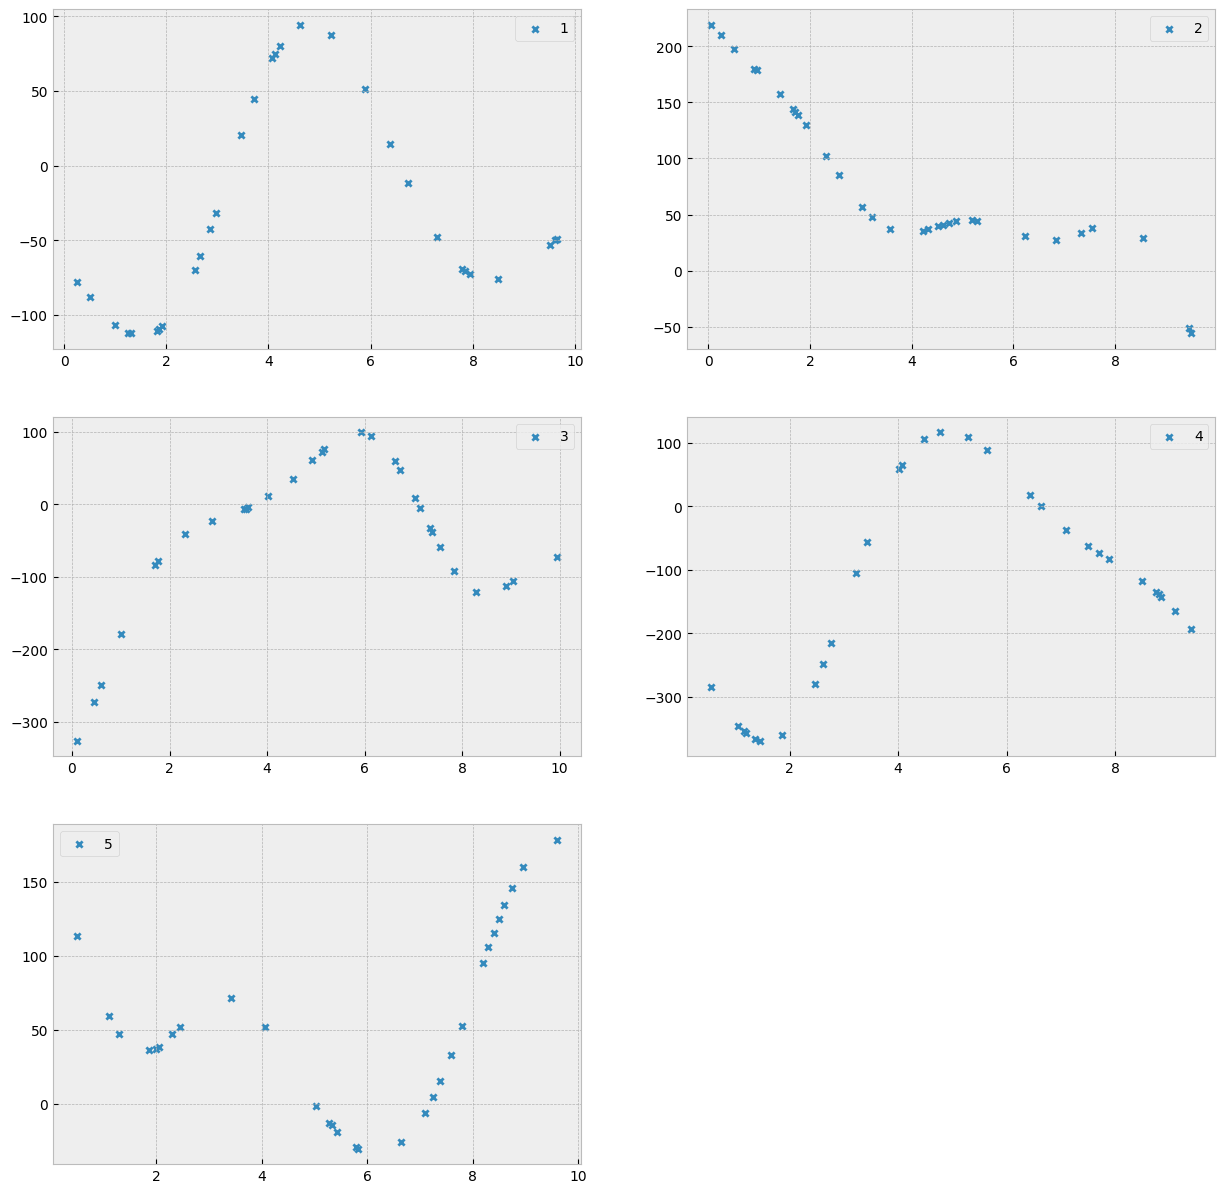

In [9]:
plt.figure(figsize=(15, int(np.ceil(M/2)) * 5))
for i in range(1, M + 1):
    plt.subplot(int(np.ceil(M/2)), 2, i)
    plt.scatter(T[i-1], Y[i - 1], label=f"{i}", s=20, marker='x')
    plt.legend()
plt.show()

In [10]:
model = MAGMA(
    T=T,
    Y=Y,
    common_T=common_T,
    m0=m0, 
    m0_function=m0_function,
    theta0=np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))]), 
    Theta=np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))]), 
    Sigma=np.random.uniform(0, 1),
    common_hp_flag=True,
    common_grid_flag=False,
    save_history_flag=True,
    scipy_optimize_display=True,
    kernel_k=ExponentiatedQuadraticKernel,
    kernel_c=ExponentiatedQuadraticKernel,
)

In [11]:
model.Y_normalized.shape

(5, 200)

In [12]:
model.T[0]

0.0

In [13]:
model.common_T

array([ 0.        ,  0.05025628,  0.10051256,  0.15076884,  0.20102513,
        0.25128141,  0.30153769,  0.35179397,  0.40205025,  0.45230653,
        0.50256281,  0.5528191 ,  0.60307538,  0.65333166,  0.70358794,
        0.75384422,  0.8041005 ,  0.85435678,  0.90461307,  0.95486935,
        1.00512563,  1.05538191,  1.10563819,  1.15589447,  1.20615075,
        1.25640704,  1.30666332,  1.3569196 ,  1.40717588,  1.45743216,
        1.50768844,  1.55794472,  1.60820101,  1.65845729,  1.70871357,
        1.75896985,  1.80922613,  1.85948241,  1.90973869,  1.95999497,
        2.01025126,  2.06050754,  2.11076382,  2.1610201 ,  2.21127638,
        2.26153266,  2.31178894,  2.36204523,  2.41230151,  2.46255779,
        2.51281407,  2.56307035,  2.61332663,  2.66358291,  2.7138392 ,
        2.76409548,  2.81435176,  2.86460804,  2.91486432,  2.9651206 ,
        3.01537688,  3.06563317,  3.11588945,  3.16614573,  3.21640201,
        3.26665829,  3.31691457,  3.36717085,  3.41742714,  3.46

In [14]:
model.T_masks[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
model.Y[0]

array([ -77.84409156,  -88.12965088, -106.90907603, -112.03677058,
       -112.40176854, -110.61794064, -109.25787057, -107.66302661,
        -69.80805593,  -60.78728589,  -42.30247189,  -32.01590372,
         20.33634845,   44.64748783,   71.98734615,   74.96679544,
         80.27652253,   94.50413347,   87.42837587,   51.52238702,
         14.59610442,  -11.83590401,  -47.99217034,  -69.49627934,
        -70.77749287,  -72.39874856,  -76.17990797,  -53.2770719 ,
        -50.03096157,  -49.23762429])

In [16]:
model.Y_normalized[0]

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,  -77.84409156,    0.        ,    0.        ,
          0.        ,    0.        ,  -88.12965088,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
       -106.90907603,    0.        ,    0.        ,    0.        ,
          0.        , -112.03677058, -112.40176854,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
       -110.61794064, -109.25787057, -107.66302661,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,  -69.80805593,
          0.        ,  -60.78728589,    0.        ,    0.        ,
          0.        ,  -42.30247189,    0.        ,  -32.01590

In [18]:
model.fit(max_iterations=1, eps=-np.inf)

MAGMA Training:   0%|          | 0/1 [00:00<?, ?it/s]


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
model.scipy_optimize_display = False
model.fit(max_iterations=49, eps=-np.inf)

MAGMA Training:   2%|▏         | 1/49 [00:30<24:20, 30.44s/it]


KeyboardInterrupt: 

In [ ]:
history = model.history
len(history)

51

In [ ]:
LL_theta0 = []
LL_Theta_Sigma = []

for epoch_history in history[1:]:
    LL_theta0.append(epoch_history["LL_theta0"])
    LL_Theta_Sigma.append(epoch_history["LL_Theta_Sigma"])

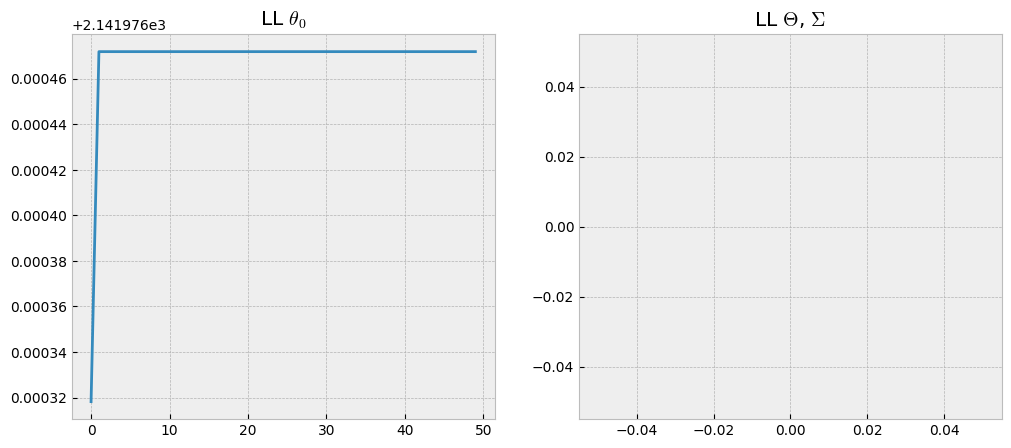

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(LL_theta0)
plt.title("LL $\\theta_0$")
plt.subplot(1, 2, 2)
plt.plot(LL_Theta_Sigma)
plt.title("LL $\Theta$, $\Sigma$")
plt.show()

In [ ]:
Sigma = []
for epoch_history in history:
    Sigma.append(epoch_history["Sigma"])

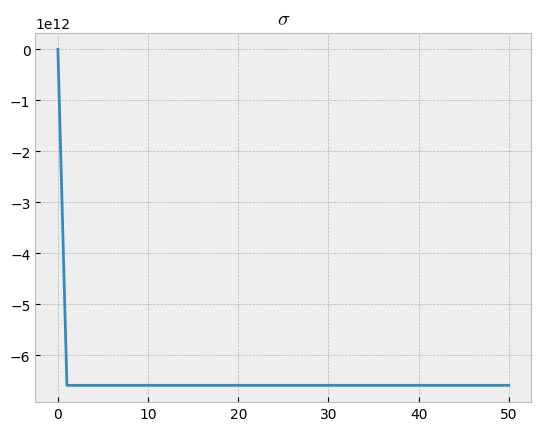

In [ ]:
plt.plot(Sigma)
plt.title("$\sigma$")
plt.show()

In [ ]:
m0_estim_norms = []
for epoch_history in history[1:]:
    m0_estim_norms.append(np.linalg.norm(epoch_history["m0"]))

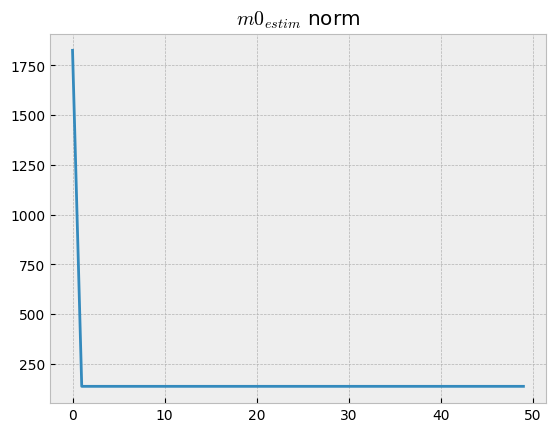

In [ ]:
plt.plot(m0_estim_norms)
plt.title("$m0_{estim}$ norm")
plt.show()

In [ ]:
theta0 = []
for epoch_history in history:
    theta0.append(epoch_history["theta0"])
theta0 = np.array(theta0)
print(model.theta0)

[64.2332537   1.96030608]


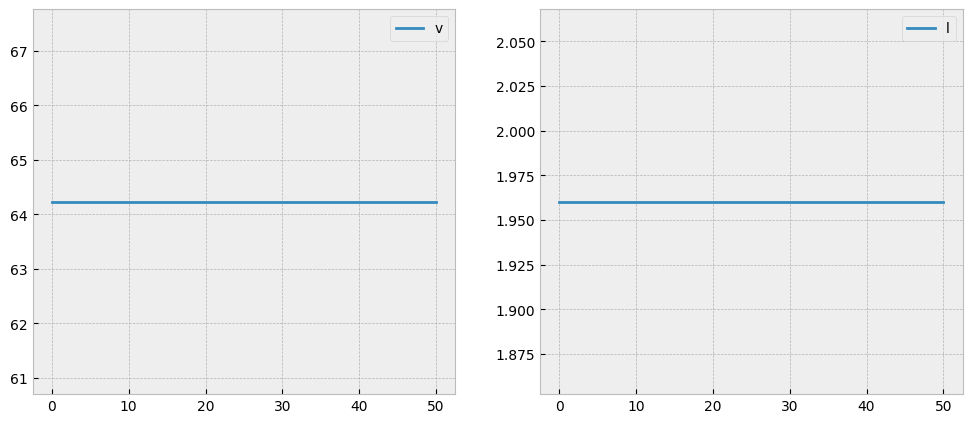

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(theta0[:, 0], label="v")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(theta0[:, 1], label="l")
plt.legend()
plt.show()

In [ ]:
Theta = []
for epoch_history in history:
    Theta.append(epoch_history["Theta"])
Theta = np.array(Theta)
print(model.Theta)

[-2.98423876e+12 -2.94687953e+14]


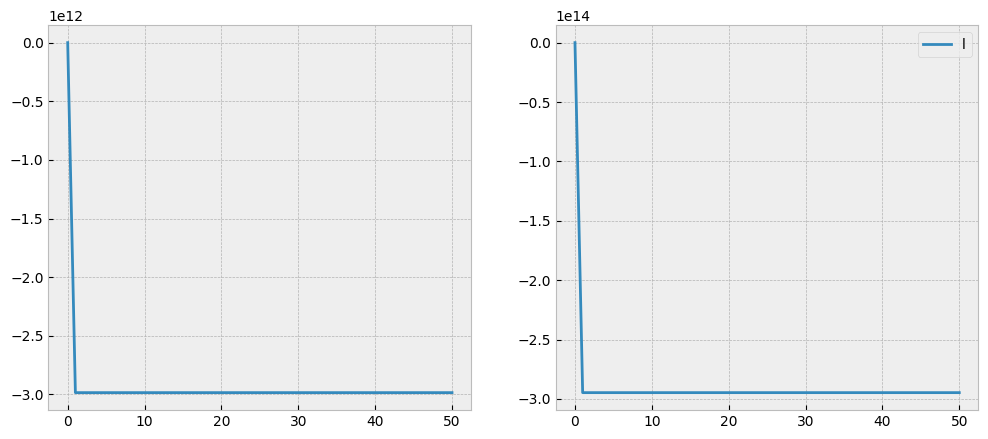

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(Theta[:, 0], label="v")
plt.subplot(1, 2, 2)
plt.plot(Theta[:, 1], label="l")
plt.legend()
plt.show()